In [21]:
# we first load the module

import dipolarBEC


In [22]:
from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [30]:
# fourier transform of viscosity vs omega for a fixed Ud/Uc, Ntubes, sigma, ny

Ntubes = 2
kx_small = 0.01
kx_large = 5.0
Uc = 1.0
Ud_1 = 0.0
Ud_2 = 0.25
Ud_3 = 0.5
Ndisr = 100
sigma = 0.5
Nmesh = 100
ny = Ntubes-1

odar = np.arange(0, 20, .002)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

visc1_or = []
visc1_oi = []
visc1_kx = []
visc2_or = []
visc2_oi = []
visc2_kx = []
visc3_or = []
visc3_oi = []
visc3_kx = []

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

for kx in tqdm(kxar):
    run1_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_1, Ndisr, sigma)
    run2_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_2, Ndisr, sigma)
    run3_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_3, Ndisr, sigma)
    visc1_kx.append( np.imag( run1_k.visc_k_ij(ny,2,1,nb) ) )
    visc2_kx.append( np.imag( run2_k.visc_k_ij(ny,2,1,nb) ) )
    visc3_kx.append( np.imag( run3_k.visc_k_ij(ny,2,1,nb) ) )




100%|██████████| 100/100 [00:00<00:00, 757.46it/s]


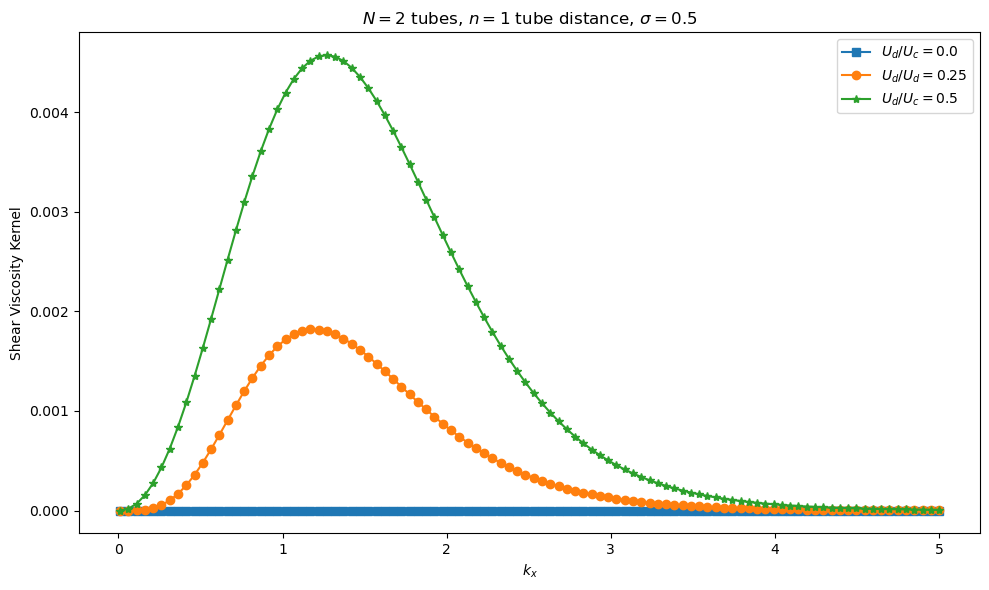

In [35]:
plt.figure(figsize=(10,6))
plt.xlabel(r"$k_x$")
plt.ylabel(r"Shear Viscosity Kernel")
plt.ylim()
plt.plot(kxar, visc1_kx, label=r'$U_d/U_c = {}$'.format(Ud_1),  marker='s')
plt.plot(kxar, visc2_kx, label=r'$U_d/U_d = {}$'.format(Ud_2), marker='o')
plt.plot(kxar, visc3_kx, label=r'$U_d/U_c = {}$'.format(Ud_3),  marker='*')

plt.legend(loc='best')
plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma))

plt.tight_layout()
#plt.savefig(os.path.join(fpath, r'visc_vs_om_2sigma.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [5]:
## viscosity


# fourier transform of viscosity vs omega for a fixed Ud/Uc, Ntubes, sigma, ny

Ntubes = 2
kx_small = 0.1
kx_large = 5.0
Uc = 1.0
Ud_1 = 0.0
Ud_2 = 0.25
Ud_3 = 0.5
Ndisr = 100
sigma = 0.5
Nmesh = 10
ny = Ntubes-1

odar = np.arange(-20, 20, .02)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

visc1_or = []
visc1_oi = []
visc1_kx = []
visc2_or = []
visc2_oi = []
visc2_kx = []
visc3_or = []
visc3_oi = []
visc3_kx = []

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)
Gamma = 0.1


for o in tqdm(odar):
    for kx in kxar:
        run1_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_1, Ndisr, sigma)
        run2_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_2, Ndisr, sigma)
        run3_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_3, Ndisr, sigma)
        visc1_kx.append( run1_k.visc_k_om(ny,o, nb, Gamma ) )
        visc2_kx.append( run2_k.visc_k_om(ny,o, nb, Gamma) )
        visc3_kx.append( run3_k.visc_k_om(ny,o, nb, Gamma) )
    visc1_or.append( np.real(intg(kxar,visc1_kx)) )
    visc2_or.append( np.real(intg(kxar,visc2_kx)) )
    visc3_or.append( np.real(intg(kxar,visc3_kx)) )
    visc1_oi.append( np.imag(intg(kxar,visc1_kx)) )
    visc2_oi.append( np.imag(intg(kxar,visc2_kx)) )
    visc3_oi.append( np.imag(intg(kxar,visc3_kx)) )




100%|██████████| 2000/2000 [00:53<00:00, 37.55it/s]


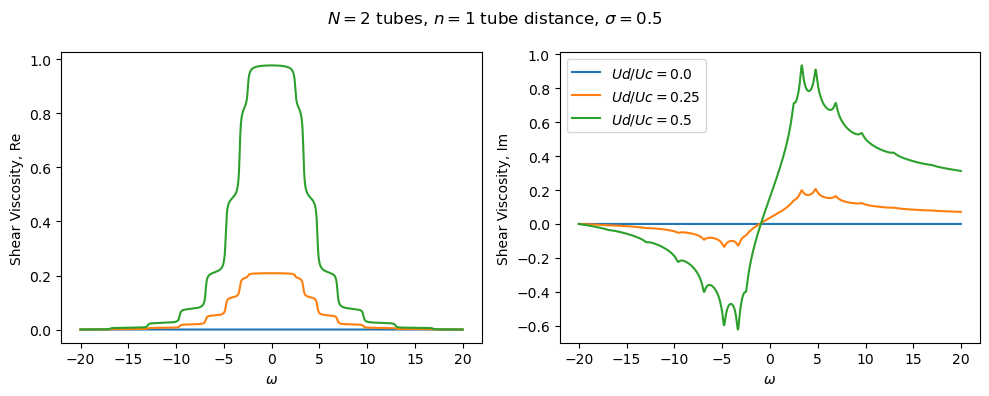

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"Shear Viscosity, Re")
ax1.plot(odar, visc1_or, label=r'$Ud/Uc = {}$'.format(Ud_1))
ax1.plot(odar, visc2_or, label=r'$Ud/Uc = {}$'.format(Ud_2))
ax1.plot(odar, visc3_or, label=r'$Ud/Uc = {}$'.format(Ud_3))
ax2.set_xlabel(r"$\omega$")
ax2.set_ylabel(r"Shear Viscosity, Im")
ax2.plot(odar, visc1_oi, label=r'$Ud/Uc = {}$'.format(Ud_1))
ax2.plot(odar, visc2_oi, label=r'$Ud/Uc = {}$'.format(Ud_2))
ax2.plot(odar, visc3_oi, label=r'$Ud/Uc = {}$'.format(Ud_3))
plt.legend(loc='best')
fig.suptitle(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma))

fig.tight_layout()
#plt.savefig(os.path.join(fpath, r'visc_vs_om_2ud_sig={}_N={}.pdf'.format(sigma,Ntubes)), format='pdf', bbox_inches='tight') # uncomment to save the figure


plt.show()

In [58]:
## viscosity


# fourier transform of viscosity vs omega for a fixed Ud/Uc, Ntubes, sigma, ny

Ntubes = 2
kx_small = 0.001
kx_large = 5.0
Uc = 1.0
Ud_1 = 0.0
Ud_2 = 0.25
Ud_3 = 0.5
Ndisr = 100
sigma = 0.5
Nmesh = 1000
ny = Ntubes-1

time_ar = np.linspace(0, 1, 100)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

visc1_t = []
visc1_kx = []
visc2_t = []
visc2_kx = []
visc3_t = []
visc3_kx = []

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)


for t in tqdm(time_ar):
    for kx in kxar:
        run1_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_1, Ndisr, sigma)
        run2_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_2, Ndisr, sigma)
        run3_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_3, Ndisr, sigma)
        visc1_kx.append( run1_k.visc_k_time(ny,t, nb) )
        visc2_kx.append( run2_k.visc_k_time(ny,t, nb) )
        visc3_kx.append( run3_k.visc_k_time(ny,t, nb) )
    visc1_t.append( np.real(intg(kxar,visc1_kx)) )
    visc2_t.append( np.real(intg(kxar,visc2_kx)) )
    visc3_t.append( np.real(intg(kxar,visc3_kx)) )
    


100%|██████████| 100/100 [03:57<00:00,  2.38s/it]


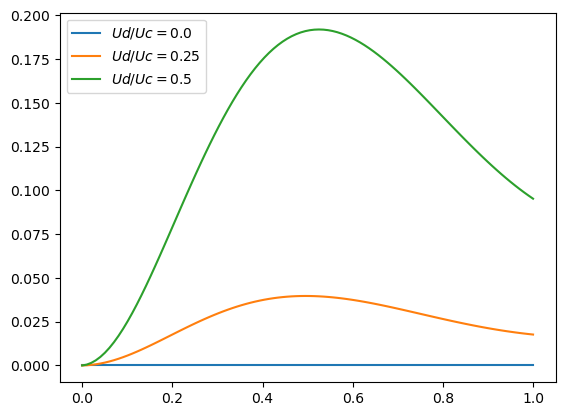

In [59]:
plt.plot(time_ar, visc1_t, label=r'$Ud/Uc = {}$'.format(Ud_1))
plt.plot(time_ar, visc2_t, label=r'$Ud/Uc = {}$'.format(Ud_2))
plt.plot(time_ar, visc3_t, label=r'$Ud/Uc = {}$'.format(Ud_3))

plt.legend(loc='best')

plt.show()

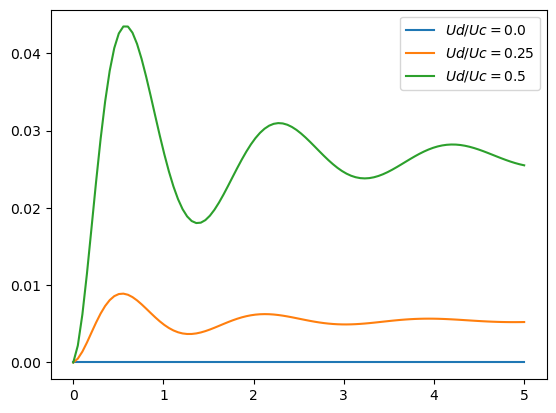

In [52]:
plt.plot(time_ar, visc1_t, label=r'$Ud/Uc = {}$'.format(Ud_1))
plt.plot(time_ar, visc2_t, label=r'$Ud/Uc = {}$'.format(Ud_2))
plt.plot(time_ar, visc3_t, label=r'$Ud/Uc = {}$'.format(Ud_3))

plt.legend(loc='best')

plt.show()

In [11]:
## viscosity


# Zero frequency viscosity vs Ud/Uc, for fix Ntubes, ny, vary sigma

Ntubes = 2
kx_small = 0.1
kx_large = 5.0
Uc = 1.0
Ud_1 = 0.0
Ud_2 = 0.25
Ud_3 = 0.5
Ndisr = 100
sigma = 0.5
Nmesh = 10
ny = Ntubes-1

Ud_ar = np.linspace(0, 0.1, 100)

sg1 = 0.0
sg2 = 0.2
sg3 = 0.3

kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

visc1 = []
visc2 = []
visc3 = []

visc1_kx = []
visc2_kx = []
visc3_kx = []


Gamma = 0.1


for Ud in tqdm(Ud_ar):

    nb1 = np.random.uniform(1-sg1, 1+sg1, Ntubes)
    nb2 = np.random.uniform(1-sg2, 1+sg2, Ntubes)
    nb3 = np.random.uniform(1-sg3, 1+sg3, Ntubes)

    for kx in kxar:
        run1_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sg1)
        run2_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sg2)
        run3_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sg3)

        visc1_kx.append( run1_k.visc_k_om(ny, 0.0, nb1, Gamma ) )
        visc2_kx.append( run2_k.visc_k_om(ny, 0.0, nb2, Gamma) )
        visc3_kx.append( run3_k.visc_k_om(ny, 0.0, nb3, Gamma) )

    visc1.append( np.abs(intg(kxar,visc1_kx)) )
    visc2.append( np.abs(intg(kxar,visc2_kx)) )
    visc3.append( np.abs(intg(kxar,visc3_kx)) )




100%|██████████| 100/100 [00:02<00:00, 49.13it/s]


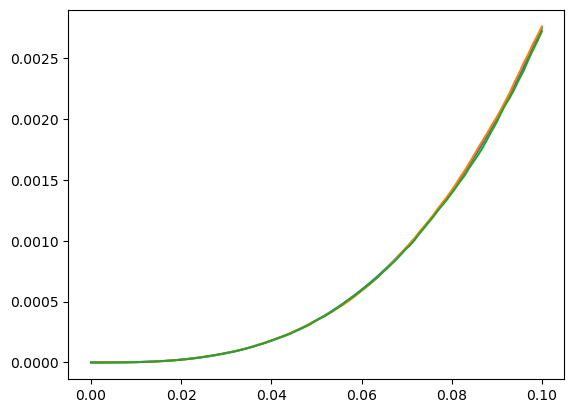

In [12]:
plt.plot(Ud_ar, visc1, label=r'$\sigma = {}$'.format(sg1)) 
plt.plot(Ud_ar, visc2, label=r'$\sigma = {}$'.format(sg2))
plt.plot(Ud_ar, visc3, label=r'$\sigma = {}$'.format(sg3))

plt.show()